In [ ]:
Importing libraries 


In [1]:
import numpy as np
import scipy.stats as s
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly as py
sns.set_style('darkgrid')
from tqdm.notebook import tqdm_notebook


Reading dataset
Please change path as necessary

In [2]:
raw_data = pd.read_csv("/content/Medical Price Dataset (1).csv")

In [3]:
raw_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Seeing the dataset and EDA


In [4]:
raw_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
raw_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Changing categorical variables

In [7]:
raw_data['sex'].replace(to_replace=['male','female'],value=[-1,1],inplace=True)
raw_data['smoker'].replace(to_replace=['yes','no'],value=[-1,1],inplace=True)

In [8]:
raw_data['region'].replace(to_replace=np.unique(raw_data.region),value=[0,1,2,3],inplace=True)


## Plotting some plots

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


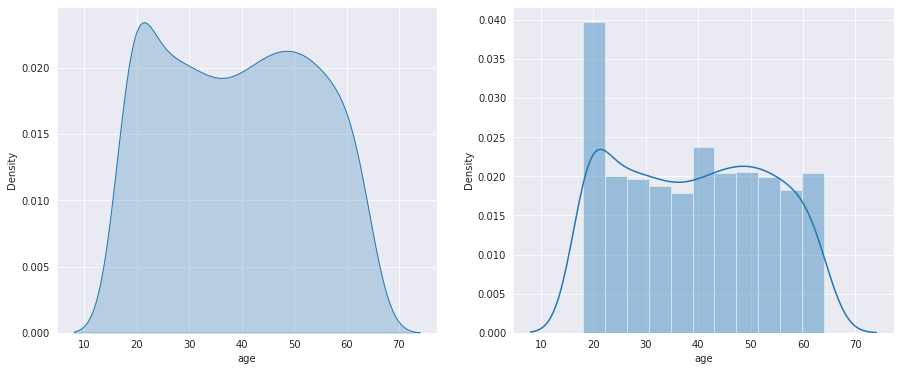

In [9]:
fig,axes = plt.subplots(1,2,figsize=(15,6))

sns.kdeplot(raw_data.age,shade=True,ax=axes[0])
sns.distplot(raw_data.age,label="Age",hist=True,ax=axes[1])
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


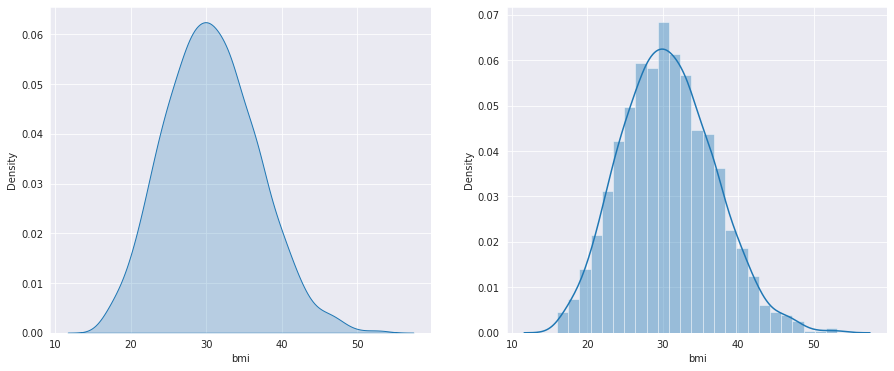

In [10]:
fig,axes = plt.subplots(1,2,figsize=(15,6))

sns.kdeplot(raw_data.bmi,shade=True,ax=axes[0])
sns.distplot(raw_data.bmi,label="Age",hist=True,ax=axes[1])
fig.show()

Smoker vs Non smoker data


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


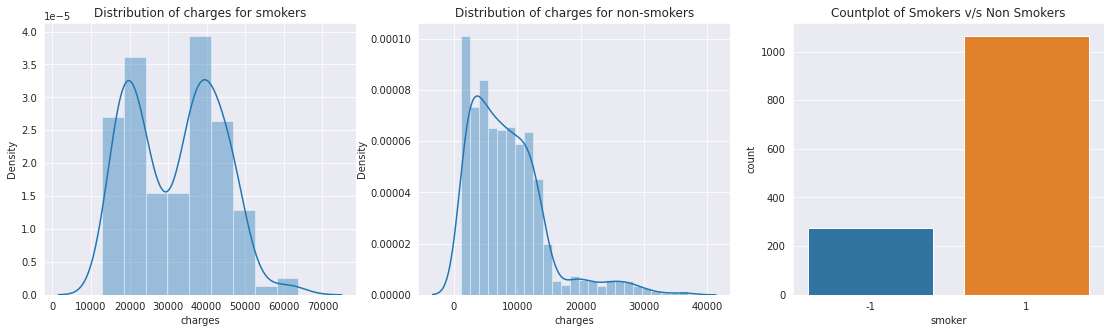

In [11]:
fig,axes = plt.subplots(1,3,figsize=(19,5))
sns.distplot(raw_data[(raw_data.smoker == -1)]["charges"],ax=axes[0])
axes[0].set_title('Distribution of charges for smokers')

sns.distplot(raw_data[(raw_data.smoker == 1)]['charges'],ax=axes[1])
axes[1].set_title('Distribution of charges for non-smokers')

sns.countplot(x="smoker",data=raw_data,ax=axes[2])
axes[2].set_title("Countplot of Smokers v/s Non Smokers")

fig.show()

Male vs female data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


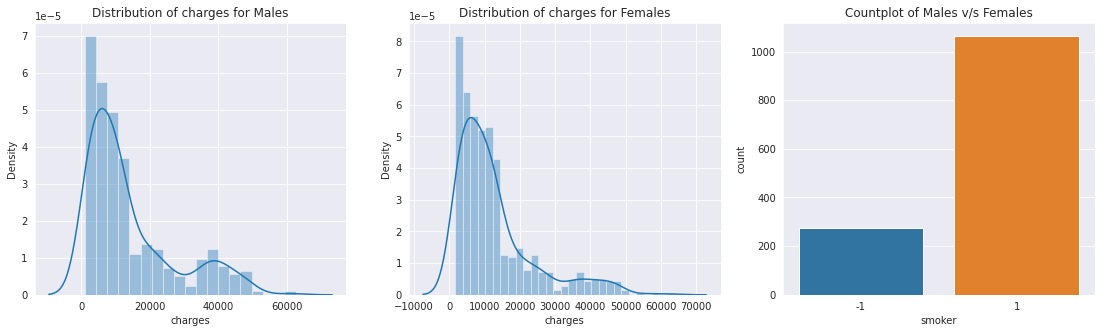

In [12]:
fig,axes = plt.subplots(1,3,figsize=(19,5))
sns.distplot(raw_data[(raw_data.sex == -1)]["charges"],ax=axes[0])
axes[0].set_title('Distribution of charges for Males')

sns.distplot(raw_data[(raw_data.sex == 1)]['charges'],ax=axes[1])
axes[1].set_title('Distribution of charges for Females')

sns.countplot(x="smoker",data=raw_data,ax=axes[2])
axes[2].set_title("Countplot of Males v/s Females")

fig.show()

Region wise comparison

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

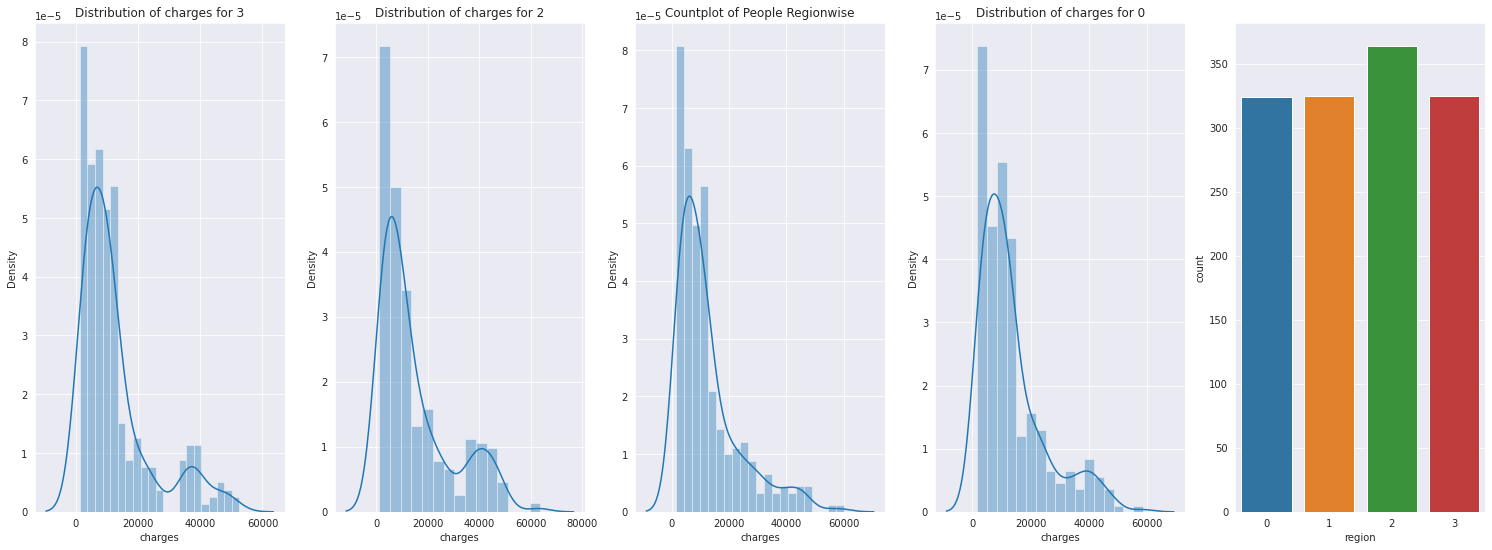

In [13]:
fig,axes = plt.subplots(1,5,figsize=(26,9))
for i in range(0,4):
    sns.distplot(raw_data[(raw_data.region == raw_data.region.unique()[i])]["charges"],ax=axes[i])
    axes[i].set_title(f'Distribution of charges for {raw_data.region.unique()[i]}')

sns.countplot(x="region",data=raw_data,ax=axes[4])
axes[2].set_title("Countplot of People Regionwise")

fig.show()

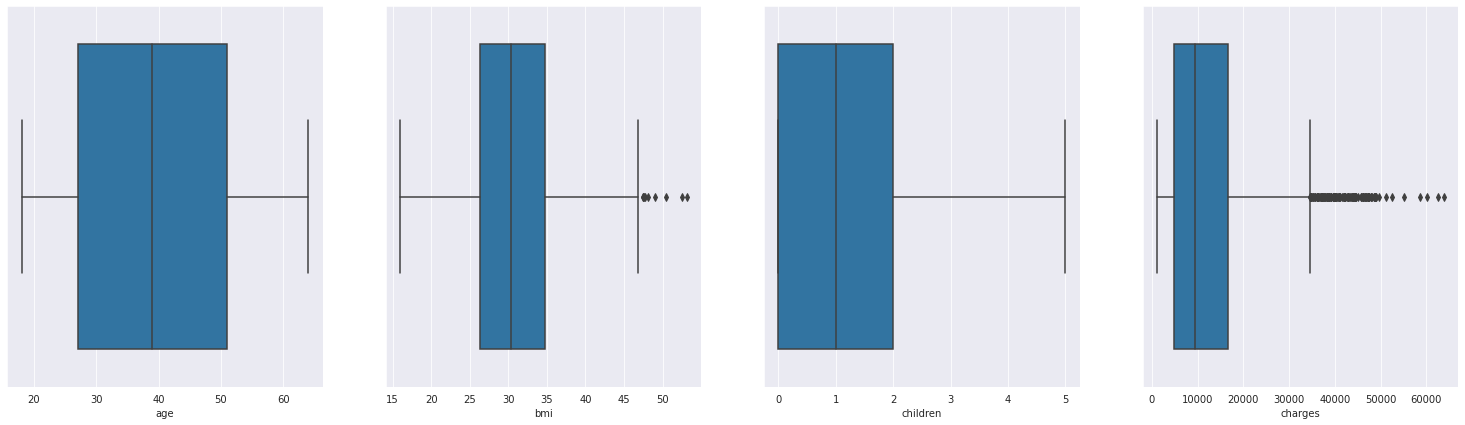

In [14]:
c = ['age','bmi','children','charges']
fig,axes = plt.subplots(1,4,figsize=(26,7))
for i in range(0,4):
    sns.boxplot(x = c[i],data = raw_data,ax=axes[i])

Correlation database

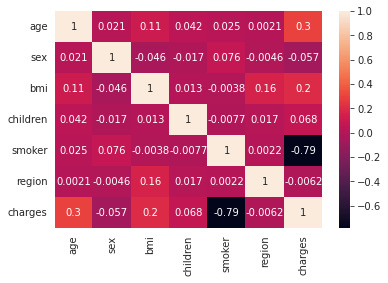

In [15]:
corr = raw_data.corr()
sns.heatmap(corr,annot=True)

In [16]:
raw_data['bmi'] = (raw_data['bmi'] - raw_data['bmi'].mean()) / raw_data['bmi'].std()


Train test split data

In [17]:
def train_test_split(df, split_ratio = 0.8,seed = 42):
  
    
    trainX = df.sample(frac=split_ratio,random_state = seed)
    testX = df.drop(trainX.index)
    trainX = trainX.reset_index(drop=True)
    testX = testX.reset_index(drop=True)
    trainY = trainX.charges.values
    trainY = trainY.reshape(trainY.shape[0],1)
    testY = testX.charges.values
    testY = testY.reshape(testY.shape[0],1)
    trainX.drop("charges",axis=1,inplace=True)
    trainX.drop('children',axis=1,inplace=True)
    trainX.drop('sex',axis=1,inplace=True)
    trainX.drop('region',axis=1,inplace=True) 
    testX.drop('children',axis=1,inplace=True)
    testX.drop('sex',axis=1,inplace=True)
    testX.drop('region',axis=1,inplace=True)
    testX.drop("charges",axis=1,inplace=True)
    return trainX,trainY,testX,testY


In [18]:
trainX,trainY,testX,testY = train_test_split(raw_data)

Functions to load data 

In [19]:
def data_preparation(train,test):
   
    train = np.array(train)
    test = np.array(test)
    trainX = np.array(list(map(lambda x: np.append([1],x) , train)))
    testX = np.array(list(map(lambda x: np.append([1],x) , test)))
    return trainX,testX

In [20]:
trainX,testX = data_preparation(trainX,testX)

Mean squared error function

In [21]:
def mse(train,theta_final,train_labels):
   
    m = train.shape[0]
    Y_hat = np.matmul(train,theta_final)
    return (1/(2*m)) * np.sum(np.square(Y_hat - train_labels))


Derivative of loss function for gradient descent

In [22]:

def delta(train,train_labels,p):
  
    m = train.shape[0]
    y_hat = np.dot(train, p)
    a = np.dot(train.T,(y_hat - train_labels))
    return  (2/m)*a

Gradient descent calculation

In [23]:
theta_initial = np.zeros((trainX.shape[1],1))
theta_final =  np.zeros((trainX.shape[1],1))
m = trainX.shape[0]
iterations = []
residual_points = [0]
lr = 10 ** (-1)

In [24]:
i = 0
for p in tqdm_notebook(range(140478)):
    theta_final = theta_initial - (lr) * delta(trainX,trainY,theta_initial) * (1/ m)
    E = int(mse(trainX,theta_final,trainY))
    residual_points.append(E)
    if residual_points[i] == residual_points[i-1] :
        break

    iterations.append(i)
    theta_initial = theta_final
    i +=1

  0%|          | 0/140478 [00:00<?, ?it/s]

Function to find R2 value

In [25]:
def R2_Statistics(theta_final):
    sst = np.sum((testY-testY.mean())**2)
    ssr = np.sum((np.matmul(testX,theta_final)-testY)**2)
    r2 = 1-(ssr/sst)
    return(r2)

R2 value ( closer to 1 is better)

In [26]:
R2_Statistics(theta_final)

0.7474268582126502

Plotting residual error with each iteration

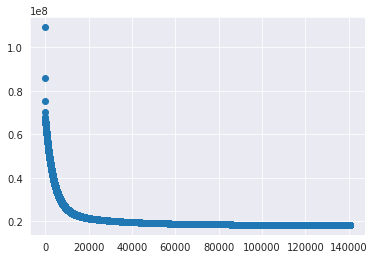

In [27]:
plt.scatter(x = iterations,y=residual_points[1:])